In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../../datasets/placement.csv")
df.shape
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


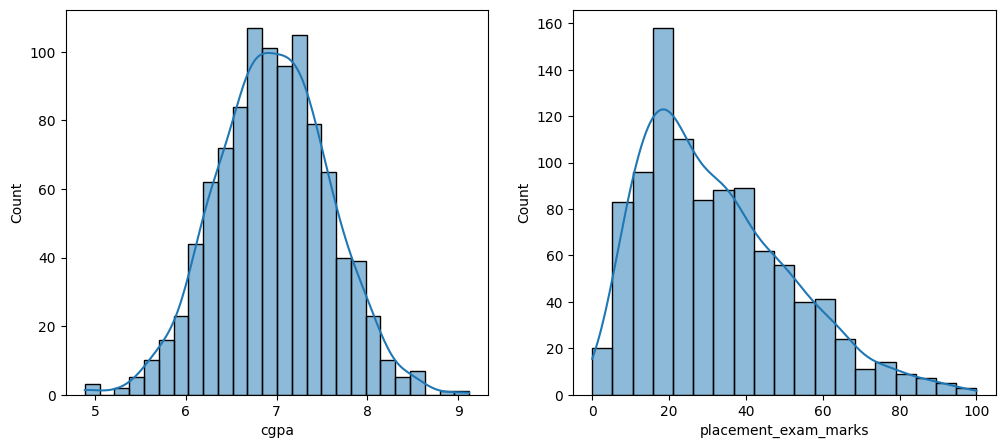

In [3]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'] , kde = True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'] , kde = True )
plt.show()

In [4]:
print(df['cgpa'].skew())
print(df['placement_exam_marks'].skew())

-0.014529938929314918
0.8356419499466834


<Axes: ylabel='placement_exam_marks'>

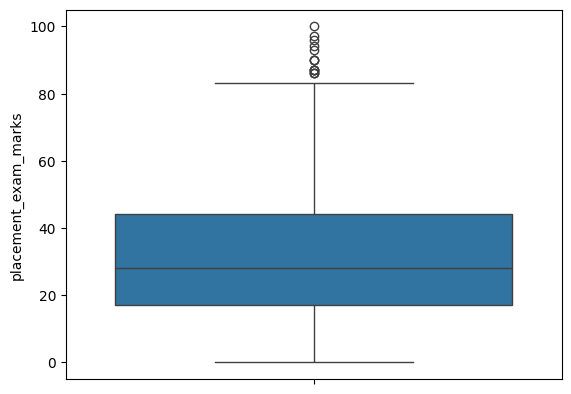

In [5]:
sns.boxplot(df['placement_exam_marks'])

In [6]:
quartile1 = df['placement_exam_marks'].quantile(0.25)
quartile3 = df['placement_exam_marks'].quantile(0.75)
iqr = quartile3 - quartile1
upperlimit = quartile3 + 1.5 * iqr
lowerlimit = quartile1 - 1.5 * iqr


In [7]:
df[df['placement_exam_marks'] > upperlimit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


<Axes: ylabel='placement_exam_marks'>

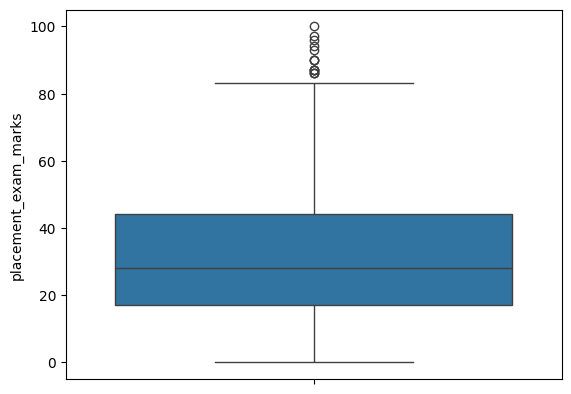

In [8]:
sns.boxplot(df['placement_exam_marks'])

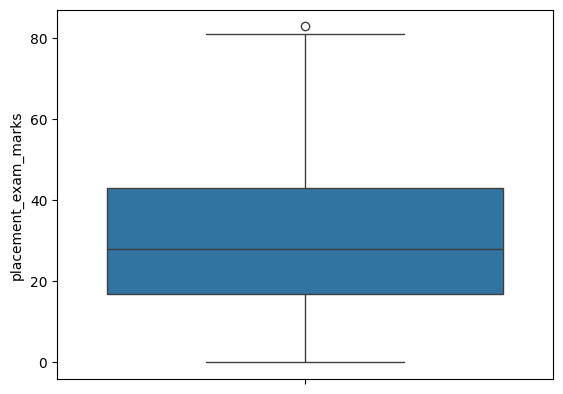

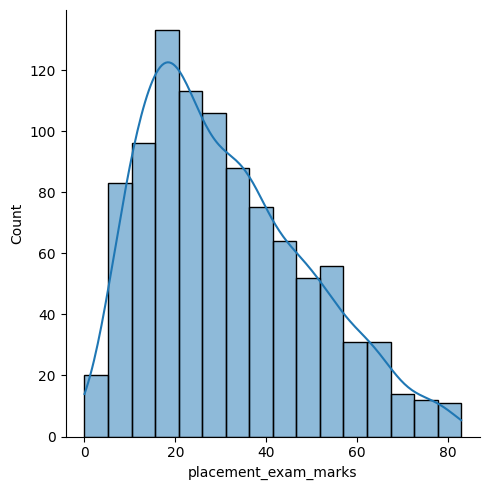

In [9]:
#trimming 
new_df = df[df['placement_exam_marks'] < upperlimit]
sns.boxplot(new_df['placement_exam_marks'])
sns.displot(new_df['placement_exam_marks'] , kde = True)

In [10]:
#capping 
cap_df = df.copy()
cap_df['placement_exam_marks'] = np.where(
    cap_df['placement_exam_marks'] > upperlimit , 
    upperlimit ,
    np.where(cap_df['placement_exam_marks'] < lowerlimit , lowerlimit , cap_df['placement_exam_marks'])
)
cap_df.shape

(1000, 3)

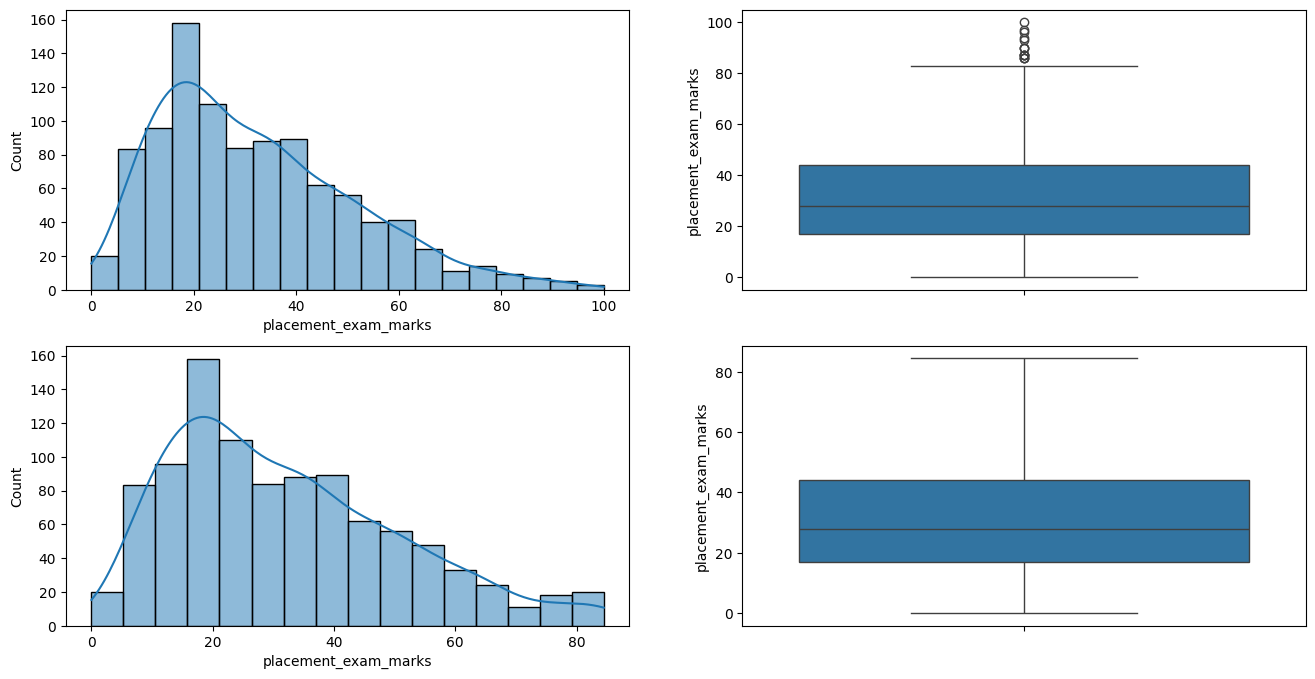

In [12]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'] , kde = True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(cap_df['placement_exam_marks'] , kde = True)

plt.subplot(2,2,4)
sns.boxplot(cap_df['placement_exam_marks'])

plt.show()